In [1]:
%reset -f

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *


%load_ext autoreload
%autoreload 2

# Load data
data = pd.read_csv('Data/non_nan_data.csv')
data = data.drop(['sun_mean', 'wind_mean', 'temp_mean', 'DK1_spot'], axis=1)

cols_to_lag = [col for col in data.columns if col.startswith('sun_') or col.startswith('temp_') or col.startswith('wind_')]
data[cols_to_lag] = data[cols_to_lag].shift(24)

data = data.dropna()

data.reset_index(drop=True, inplace=True)

datasets = {hour: data[pd.to_datetime(data["DATE"]).dt.hour == hour] for hour in range(24)}

for hour, df in datasets.items():
    df.to_csv(f"Splits/dataset_hour_{hour}.csv", index=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


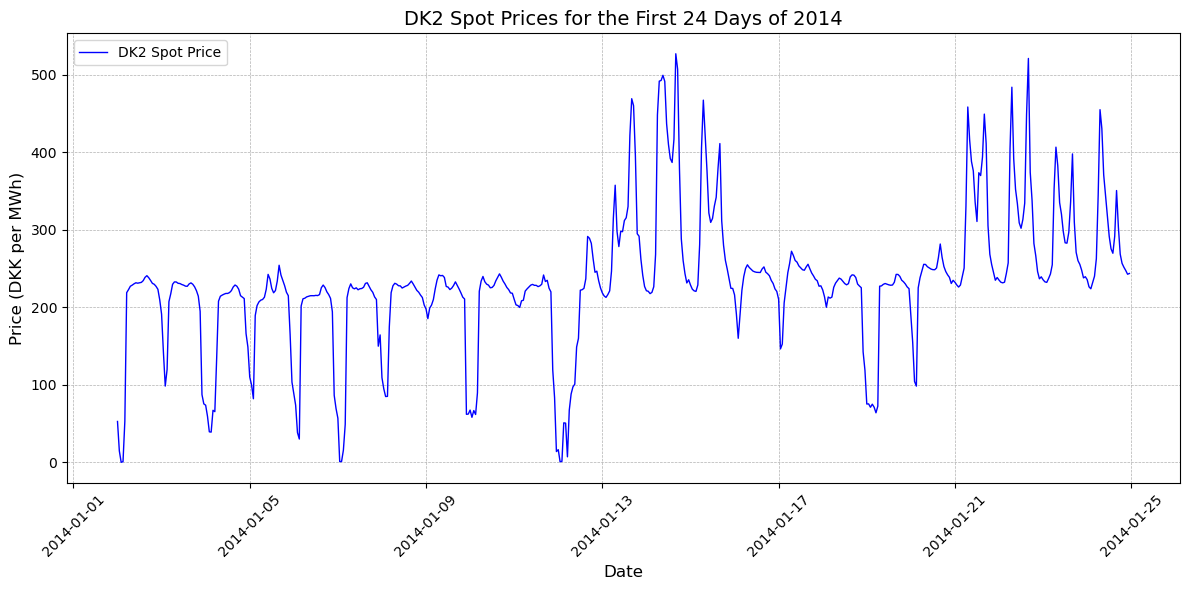

In [5]:
# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Filter data for the first 24 days of 2014
filtered_data = data[(data['DATE'] >= '2014-01-01') & (data['DATE'] < '2014-01-25')]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], filtered_data['DK2_spot'], label='DK2 Spot Price', color='blue', linewidth=1)

# Adding labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (DKK per MWh)', fontsize=12)
plt.title('DK2 Spot Prices for the First 24 Days of 2014', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()